In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('hr.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [5]:
data = data[['satisfaction_level','average_montly_hours', 'time_spend_company', 'Work_accident', 'sales', 'salary']];

In [6]:
dic = {'satisfaction_level':'manyidu', 'average_montly_hours':'yue_gongshi', 'time_spend_company':'tian_gongshi',
      'Work_accident':'shigu', 'sales':'leixing', 'salary':'gongzi'}

In [7]:
data.columns = data.columns.map(lambda x : dic.get(x))

In [8]:
data.head()

,manyidu,yue_gongshi,tian_gongshi,shigu,leixing,gongzi
0,0.38,157,3,0,sales,low
1,0.80,262,6,0,sales,medium
2,0.11,272,4,0,sales,medium
3,0.72,223,5,0,sales,low
4,0.37,159,3,0,sales,low


In [10]:
data.leixing.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [11]:
data.groupby('leixing').size()

leixing
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64

In [13]:
data1 = data.groupby(['gongzi','leixing'])['yue_gongshi'].mean().unstack(0)

In [14]:
data1

gongzi,high,low,medium
leixing,,,
IT,194.927711,201.382594,204.295327
RandD,199.745098,198.747253,202.954301
accounting,205.905405,199.899441,201.465672
hr,209.066667,202.456716,193.863510
management,200.248889,200.744444,202.653333
marketing,185.575000,204.487562,196.869681
product_mng,194.632353,201.048780,199.637076
sales,201.178439,200.363030,201.520316
support,203.985816,198.900524,202.535032


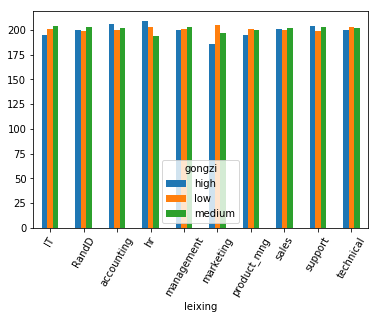

In [15]:
%matplotlib inline
data1.plot.bar(rot = 60)

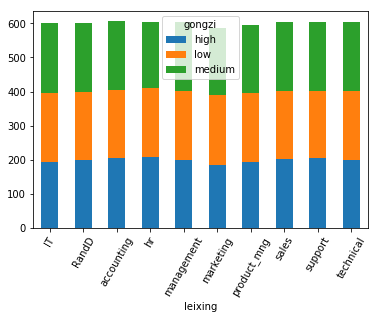

In [17]:
data1.plot.bar(stacked = True, rot = 60)

In [21]:
def zb(group):
    g = group['manyidu'].sort_values(ascending = False)
    return g[:5]

In [22]:
data.groupby(['gongzi', 'leixing']).apply(zb)

gongzi  leixing           
high    IT           7011     0.99
                     8309     0.97
                     10749    0.96
                     12960    0.96
                     7998     0.95
        RandD        8850     0.97
                     8773     0.97
                     4044     0.94
                     8317     0.93
                     7018     0.89
        accounting   4734     0.97
                     9996     0.97
                     7510     0.96
                     9799     0.96
                     5984     0.96
        hr           8887     0.99
                     9343     0.99
                     5987     0.98
                     6594     0.98
                     3237     0.97
        management   13603    0.98
                     13557    0.98
                     11346    0.98
                     11392    0.98
                     11576    0.97
        marketing    2295     1.00
                     6955     0.99
                     7107   

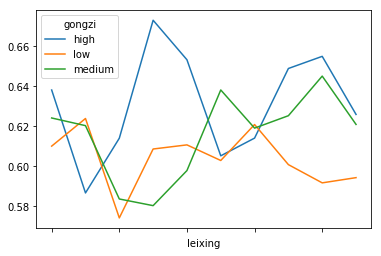

In [23]:
data.groupby(['gongzi','leixing'])['manyidu'].mean().unstack(0).plot(rot=60)

In [24]:
data.sort_values(by = 'manyidu')[:20]

,manyidu,yue_gongshi,tian_gongshi,shigu,leixing,gongzi
14484,0.09,296,4,0,technical,low
1873,0.09,279,4,0,technical,low
340,0.09,308,5,0,hr,medium
1882,0.09,282,4,0,support,low
332,0.09,271,4,0,sales,low
12765,0.09,214,2,0,support,medium
12761,0.09,249,4,0,sales,low
350,0.09,304,5,0,technical,medium
761,0.09,249,4,0,sales,low
14489,0.09,254,4,0,support,low


In [25]:
cats = pd.cut(data.manyidu, 4)

In [26]:
cats.value_counts()

(0.545, 0.772]     4758
(0.772, 1.0]       4682
(0.318, 0.545]     3559
(0.0891, 0.318]    2000
Name: manyidu, dtype: int64

In [28]:
data.groupby(['leixing', cats]).size().unstack()

manyidu,"(0.0891, 0.318]","(0.318, 0.545]","(0.545, 0.772]","(0.772, 1.0]"
leixing,,,,
IT,162,261,419,385
RandD,110,161,261,255
accounting,130,201,224,212
hr,98,204,226,211
management,72,133,252,173
marketing,99,227,261,271
product_mng,106,224,284,288
sales,551,1007,1255,1327
support,281,531,708,709


In [29]:
def xg(group):
    return group['manyidu'].corr(group['yue_gongshi'])

In [30]:
data.groupby(['gongzi', 'leixing']).apply(xg)

gongzi  leixing    
high    IT            -0.012342
        RandD         -0.005882
        accounting    -0.116915
        hr            -0.367328
        management     0.110142
        marketing      0.043682
        product_mng    0.185977
        sales         -0.019211
        support        0.110056
        technical      0.059634
low     IT            -0.050652
        RandD          0.024502
        accounting    -0.094572
        hr             0.057382
        management     0.119263
        marketing     -0.108724
        product_mng   -0.005578
        sales          0.038390
        support       -0.037357
        technical     -0.122417
medium  IT            -0.090033
        RandD         -0.085990
        accounting    -0.126349
        hr            -0.017208
        management    -0.111219
        marketing      0.119068
        product_mng   -0.014252
        sales          0.015054
        support        0.033612
        technical     -0.057385
dtype: float64